<h1>Elementy statystyki opisowej - projekt Joanny Książczyk, AD 2018/2019</h1>


In [1]:
import glob #Unix style pathname pattern expansion
import csv
import numpy as np #bazy danych
import matplotlib.pyplot as plt #wykresy
import matplotlib.mlab as mlab #wykresy
%matplotlib inline 
import datetime #czas, przyda się potem 
import csv #czytanie plików csv
import pandas as pd #wykresy, histogramy
#import plotly #wykresy z matplotliba ale na razie olewanko

In [2]:
#ŚCIEŻKI DOSTĘPU
#########################################################################
user_path='Joanna_Książczyk_dane.csv'

#########################################################################
stats_path=r'''\stats\stats.csv'''

#########################################################################
empty_char=str(chr(45))
def zamianaznaku(lista):
    for i in range(0,len(lista)):
        if(lista[i]==empty_char):
            lista[i]='0'
    return lista

In [3]:
#tworzymy listę lat do wykresów jako oś x
lata=[]
for i in range(1995,2019):
    lata.append(i)
#DATA LISTS
ID=[] #KOD
miasta=[] #miasta
kina=[] #ogolem kina w latach
sale=[] #ilosc sal w latach
miejsca=[] #miejsca na widowni w latach
seanse=[] #seanse ogolem w latach
seansepl=[] #ilosc seansow filmow produkcji polskiej
widzowie=[] #liczba widzow ogolem
widzowiepl=[] #liczba widzow na filmach produkcji polskiej
osoby_niepelnosprawne_obiekty=[] #ilosc obiektow dla osob niepelnosprawnych
osoby_niepelnosprawne_wejscia=[] #ilosc podjazdow dla niepelnosprawnych
osoby_niepelnosprawne_udogodnienia=[] #ilosc udogodnien dla niepelnosprawnych

In [4]:
#sprawdzanie pliku scv
if not user_path:
    print ("Plik nie istnieje, system exit")
    system.exit()

In [5]:
#ZCZYTANIE CSV DO data
data=[]
data=pd.read_csv(user_path, engine='python')

In [6]:
#BRUDNOPIS###################################################################################
#data2=data.iloc[0:3,0:4]

#usuwanie Kodu
#data2=data2.set_index("Kod", drop = False)

#w wierszu 240

#data2 = data.transpose()
#data2 = data2.drop(dataSheet.columns[[0,1]], axis=1)
#data2 = data2.drop(['World Development Indicators', 'Unnamed: 2','Unnamed: 3'])
#print(data2)
##############################################################################################

<h1>Część I</h1>

<h2>Rozwój kin w Polsce w poszczególnych latach 1995-2018 - Czy kin jest coraz więcej, czy może podupadają? Czy liczba miejsc i sale kinowe się powiększają?</h2>

<h3>1) Analiza ilości kin</h3>

In [7]:
#Pobieramy tutaj konkretne interesujące nas dane, w tym przypadku ilość kin w całej polsce w latach 1995-2018

kina=data.iloc[0:1,2:26]
#transponujemy teraz pobrane dane żeby utworzyć wykres
kina = kina.transpose()
#data.iloc[2:26,0:1]
print(kina)
#tak wygląda kina i jest typu DATA FRAME

        0
1995  702
1996  690
1997  674
1998  675
1999  682
2000  675
2001  648
2002  619
2003  581
2004  545
2005  536
2006  505
2007  496
2008  483
2009  448
2010  438
2011  448
2012  447
2013  469
2014  463
2015  444
2016  484
2017  491
2018    -


In [8]:
#Teraz dataframe przerobimy na listę normalną coby łatwiej operować
# data2.iat[0,0] służy do pobierania wartości z indexu [0,0]
#na razie nie będzie używane ale przyda się w przyszłości
lista=[]
for i in range(len(kina)):
    lista.append(kina.iat[i,0])

  1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 ...  2008 2009 2010 2011  \
0  702  690  674  675  682  675  648  619  581  545 ...   483  448  438  448   

  2012 2013 2014 2015 2016 2017  
0  447  469  463  444  484  491  

[1 rows x 23 columns]


Text(0.5, 0, 'Lata')

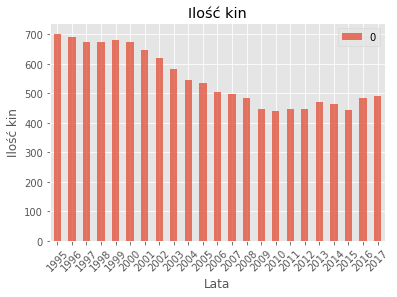

In [9]:
#WYKRES ZMIANY ILOŚCI KIN W POLSCE W ZALEŻNOŚCI DO ROKU
#2:25 bo 26 jest "-" 
kina2=data.iloc[0:1,2:25]
print(kina2)
kina2=kina2.astype(float)
plt.style.use('ggplot') #wygląd wykresu, kind='bar' w t.plot ustawia histogram
#kina2.T to transponowanie kina2
kina2.T.plot(alpha=0.75, rot=45,kind='bar')

plt.title("Ilość kin")
plt.ylabel("Ilość kin")
plt.xlabel("Lata")

<h3>2) Analiza ilości sal kinowych</h3>

In [10]:
sale=[]
sale=data.iloc[0:1,26:50]
for i in range(0,len(lata)):
    sale.columns.values[i]=lata[i]
sale = sale.transpose()
print(sale)

         0
1995     -
1996     -
1997     -
1998     -
1999     -
2000   821
2001   855
2002   874
2003   880
2004   870
2005   937
2006   931
2007  1008
2008  1043
2009  1061
2010  1076
2011  1122
2012  1162
2013  1243
2014  1243
2015  1276
2016  1364
2017  1416
2018     -


In [11]:
lista2=[]
for i in range(len(sale)):
    lista2.append(sale.iat[i,0])

  2000 2001 2002 2003 2004 2005 2006  2007  2008  2009  2010  2011  2012  \
0  821  855  874  880  870  937  931  1008  1043  1061  1076  1122  1162   

   2013  2014  2015  2016  2017  
0  1243  1243  1276  1364  1416  


Text(0.5, 0, 'Lata')

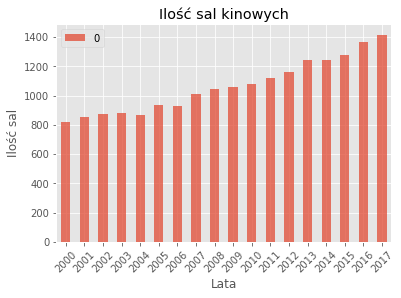

In [12]:
sale2=data.iloc[0:1,31:49]
print(sale2)
sale2=sale2.astype(float)
plt.style.use('ggplot') 
sale2.T.plot(alpha=0.75, rot=45,kind='bar')

plt.title("Ilość sal kinowych")
plt.ylabel("Ilość sal")
plt.xlabel("Lata")

<h3>3) Analiza ilości miejsc na widowni w kinach</h3>

In [13]:
miejsca=[]
miejsca=data.iloc[0:1,50:74]
miejsca = miejsca.transpose()
print(miejsca)

             0
1995.2  213066
1996.2  206122
1997.2  199999
1998.2  201235
1999.2  210809
2000.2  226797
2001.2  231650
2002.2  235481
2003.2  230817
2004.2  225454
2005.2  235248
2006.2  232471
2007.2  244174
2008.2  249533
2009.2  248181
2010.2  248029
2011.2  249390
2012.2  257849
2013.2  271781
2014.2  266479
2015.2  271011
2016.2  283400
2017.2  287948
2018.2       -


   1996.2  1997.2  1998.2  1999.2  2000.2  2001.2  2002.2  2003.2  2004.2  \
0  206122  199999  201235  210809  226797  231650  235481  230817  225454   

   2005.2   ...    2008.2  2009.2  2010.2  2011.2  2012.2  2013.2  2014.2  \
0  235248   ...    249533  248181  248029  249390  257849  271781  266479   

   2015.2  2016.2  2017.2  
0  271011  283400  287948  

[1 rows x 22 columns]


Text(0.5, 0, 'Lata')

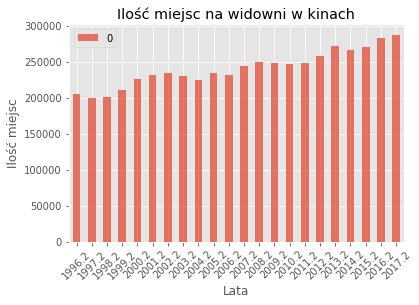

In [14]:
miejsca2=data.iloc[0:1,51:73]
print(miejsca2)
miejsca2=miejsca2.astype(float)
plt.style.use('ggplot') 
miejsca2.T.plot(alpha=0.75, rot=45,kind='bar')

plt.title("Ilość miejsc na widowni w kinach")
plt.ylabel("Ilość miejsc")
plt.xlabel("Lata")

<h1>Część II</h1>

<h2>Jak zmieniła się liczba seansów w polskich kinach na przestrzeni lat? Jak wiele polskich filmów powstaje co roku na tle wszystkich produkcji? - analiza ilości seansów w kinach, porównanie ogólnej ilości seansów z ilością seansów polskich</h2>

<h3>1) Analiza ilości seansów ogółem</h3>

In [15]:
seanse=[]
seanse=data.iloc[0:1,74:98]
for i in range(0,len(lata)):
    seanse.columns.values[i]=lata[i]
seanse = seanse.transpose()
print(seanse)

            0
1995   364238
1996   377316
1997   407295
1998   402055
1999   406739
2000   526763
2001   687791
2002   739342
2003   816705
2004   889868
2005   947878
2006  1037138
2007  1190879
2008  1326008
2009  1416677
2010  1476905
2011  1569062
2012  1565688
2013  1645637
2014  1756954
2015  1792660
2016  1988399
2017  2080183
2018        -


     1995    1996    1997    1998    1999    2000    2001    2002    2003  \
0  364238  377316  407295  402055  406739  526763  687791  739342  816705   

     2004   ...        2008     2009     2010     2011     2012     2013  \
0  889868   ...     1326008  1416677  1476905  1569062  1565688  1645637   

      2014     2015     2016     2017  
0  1756954  1792660  1988399  2080183  

[1 rows x 23 columns]


Text(0.5, 0, 'Lata')

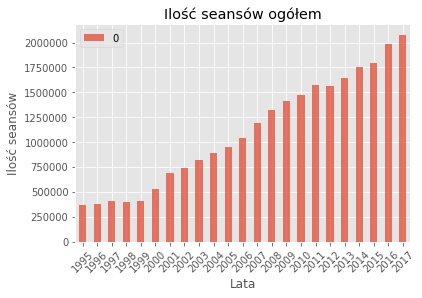

In [16]:
seanse2=data.iloc[0:1,74:97]
print(seanse2)
seanse2=seanse2.astype(float)
plt.style.use('ggplot') 
seanse2.T.plot(alpha=0.75, rot=45,kind='bar')

plt.title("Ilość seansów ogółem")
plt.ylabel("Ilość seansów")
plt.xlabel("Lata")

<h3>2) Analiza ilości polskich seansów</h3>

In [17]:
seansepl=[]
seansepl=data.iloc[0:1,98:122]
for i in range(0,len(lata)):
    seansepl.columns.values[i]=lata[i]
seansepl = seansepl.transpose()
print(seansepl)

           0
1995       -
1996       -
1997       -
1998       -
1999  111042
2000   72337
2001  132821
2002  122022
2003   78383
2004   75151
2005   76553
2006  150059
2007  169121
2008  252144
2009  267127
2010  198069
2011  323068
2012  224748
2013  294732
2014  296560
2015  267102
2016  354165
2017  378484
2018       -


     1999   2000    2001    2002   2003   2004   2005    2006    2007    2008  \
0  111042  72337  132821  122022  78383  75151  76553  150059  169121  252144   

     2009    2010    2011    2012    2013    2014    2015    2016    2017  
0  267127  198069  323068  224748  294732  296560  267102  354165  378484  


Text(0.5, 0, 'Lata')

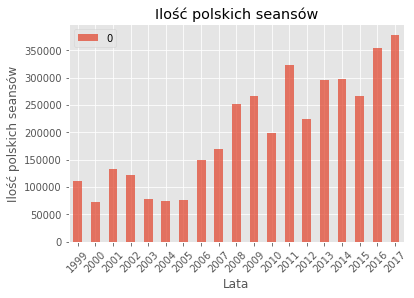

In [18]:
seansepl2=data.iloc[0:1,102:121]
print(seansepl2)
seansepl2=seansepl2.astype(float)
plt.style.use('ggplot') 
seansepl2.T.plot(alpha=0.75, rot=45,kind='bar')

plt.title("Ilość polskich seansów")
plt.ylabel("Ilość polskich seansów")
plt.xlabel("Lata")

<h3>3) Analiza porównawcza ilości wszystkich seansów a ilości seansów polskich</h3>

[364238, 377316, 407295, 402055, 406739, 526763, 687791, 739342, 816705, 889868, 947878, 1037138, 1190879, 1326008, 1416677, 1476905, 1569062, 1565688, 1645637, 1756954, 1792660, 1988399, 2080183, 0]
######################
[0, 0, 0, 0, 111042, 72337, 132821, 122022, 78383, 75151, 76553, 150059, 169121, 252144, 267127, 198069, 323068, 224748, 294732, 296560, 267102, 354165, 378484, 0]


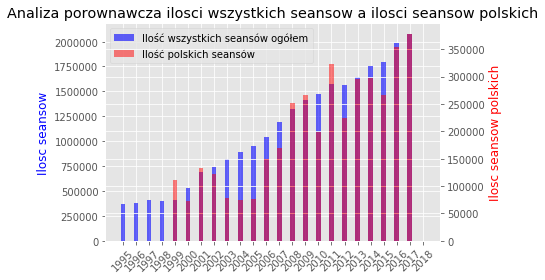

<Figure size 10800x7200 with 0 Axes>

In [69]:
seanse = seanse.transpose()
if (len(seanse.index)!=len(seansepl.index)):
    print("Oś x musi być taka sama, a jest {} i {}".format(len(seanse.index),len(seansepl.index)))
#if true to musimy przerobic te dane
t,data1,data2=[],[],[]
for i in seanse.index:
    t.append(i)

#ustawmy wsio na inty xD
for i in range(0,len(seanse.values.tolist())):
    if (seanse.values.tolist()[i][0]==empty_char):
        data1.append(0)
    else:
        data1.append(int(seanse.values.tolist()[i][0]))
        
    if (seansepl.values.tolist()[i][0]==empty_char):
        data2.append(0)
    else:
        data2.append(int(seansepl.values.tolist()[i][0]))


#usuwamy znak '-' niewygodny przy tworzeniu wykresu
data1=zamianaznaku(data1) #ilosc kin
data2=zamianaznaku(data2) #ilosc sali


if (len(data1)!=len(data2)):
    print("EJ TE DATAS SĄ RÓŻNE W SUMIE {} i {}".format(len(seanse.index),len(seansepl.index)))

print(data1)
print("######################")
print(data2)    
n_groups=len(t)

fig, ax = plt.subplots()

#ustawiamy druga os y
par1 = ax.twinx()

#par1.set_ylim(0, maks) to są limity osi jak cos
#ax.set_ylim(0, 2)

#index, index2 = [i for i in range(0,n_groups*2,2)], [n for n in range(1,n_groups*2,2)]
index = np.arange(n_groups)
bar_width = 0.35
opacity = 1

rects1 = ax.bar(index, data1, bar_width,
alpha=0.6,
color='b',
label='Ilość wszystkich seansów ogółem'
#,bottom=data2 to na razie olej
)

rects2 =par1.bar(index, data2, bar_width,
alpha=0.5,
color='r',
label='Ilość polskich seansów')


 

#sprawdzmy in close jak to trybi, wyeksportujmy do pdf
plt.savefig('wykres.pdf')

#kolorki labeli
ax.yaxis.label.set_color('b')
par1.yaxis.label.set_color('r')


plt.xlabel('Lata')
ax.set_ylabel('Ilosc seansow')
par1.set_ylabel('Ilosc seansow polskich')
plt.title('Analiza porownawcza ilosci wszystkich seansow a ilosci seansow polskich')
plt.xticks(index, (lata))
#obracamy napisy na osi x
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

#legenda
lines = [rects1, rects2]
ax.legend(lines, [l.get_label() for l in lines])

plt.figure(figsize=(150, 100))

    
plt.tight_layout()
plt.show()

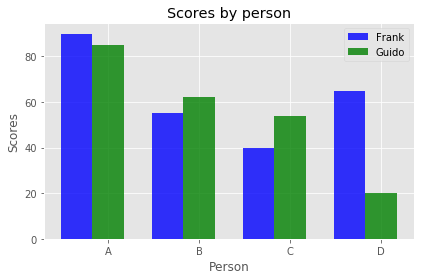

In [21]:
#CO TO I PO CO? Do usunięcia co?
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 4
means_frank = (90, 55, 40, 65)
means_guido = (85, 62, 54, 20)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='Frank')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='g',
label='Guido')
 
plt.xlabel('Person')
plt.ylabel('Scores')
plt.title('Scores by person')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()
 
plt.tight_layout()
plt.show()

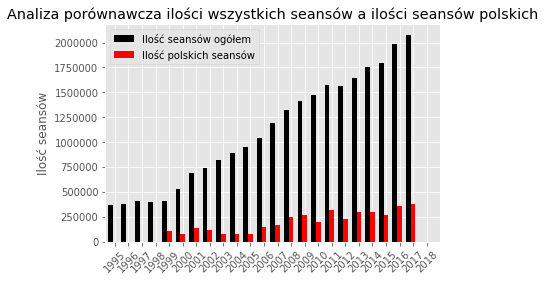

In [72]:
#a to już działa
fig = plt.figure()
ax = fig.add_subplot(111)


N = 24

ind = np.arange(N)                
width = 0.35                      

rects1 = ax.bar(ind, data1, width,
                color='black')

rects2 = ax.bar(ind+width, data2, width,
                color='red')


ax.set_xlim(-width,len(ind)+width)
#ax.set_ylim(0,50)

ax.set_ylabel('Ilość seansów')
ax.set_title('Analiza porównawcza ilości wszystkich seansów a ilości seansów polskich')
xTickMarks = lata
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('Ilość seansów ogółem', 'Ilość polskich seansów') )

plt.show()

<h1>Część III</h1>

<h2>Czy widzów w kinach przybywa, czy może ubywa? Czy Polacy chętniej chodzą na filmy polskie czy zagraniczne? - zbadanie ilości widzów w kinach, porównanie liczby widzów na produkcjach polskich z ogólną liczbą widzów</h2>

<h3>1) Analiza liczby widzów w kinach</h3>

In [74]:
widzowie=[]
widzowie=data.iloc[0:1,122:146]
for i in range(0,len(lata)):
    widzowie.columns.values[i]=lata[i]
widzowie = widzowie.transpose()
print(widzowie)

             0
1995  22524485
1996  22089757
1997  24260971
1998  20265173
1999  27474710
2000  20860292
2001  27600631
2002  27067688
2003  25243139
2004  33223152
2005  24836170
2006  32362507
2007  33781873
2008  35179453
2009  38975258
2010  37528085
2011  39616332
2012  37474283
2013  36936592
2014  41030024
2015  45681501
2016  51823896
2017  56718898
2018         -


Text(0.5, 0, 'Lata')

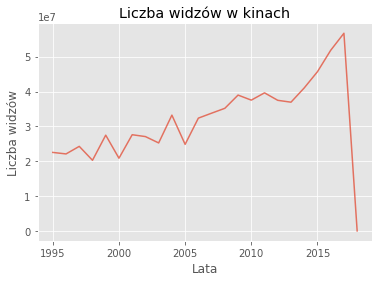

In [125]:
y=[]
#konwertujemy na int
for i in range(0,len(widzowie)):
    if (widzowie.values[i][0]==empty_char):
        y.append(0)
    else:
        y.append(int(widzowie.values[i][0]))
index=widzowie.index.tolist()
plt.style.use('ggplot') 
plt.plot(index, y, alpha=0.75)

plt.title("Liczba widzów w kinach")
plt.ylabel("Liczba widzów")
plt.xlabel("Lata")

In [ ]:
2) 